# Selenium image screenshot

- pillow is Python package to control images
- install pillow
    - `$ pip3 install pillow`
    
http://pillow.readthedocs.io/en/3.1.x/reference/Image.html

In [1]:
import time
from selenium import webdriver
from PIL import Image as pil

In [2]:
# open Chrome browser and move to youtube page
driver =  webdriver.Chrome()
driver.get("https://www.youtube.com/watch?v=tXOJIBPwSyo&t=200s")
time.sleep(1)
driver.save_screenshot('screenshot.png')

True

### show image

(2400, 1164)


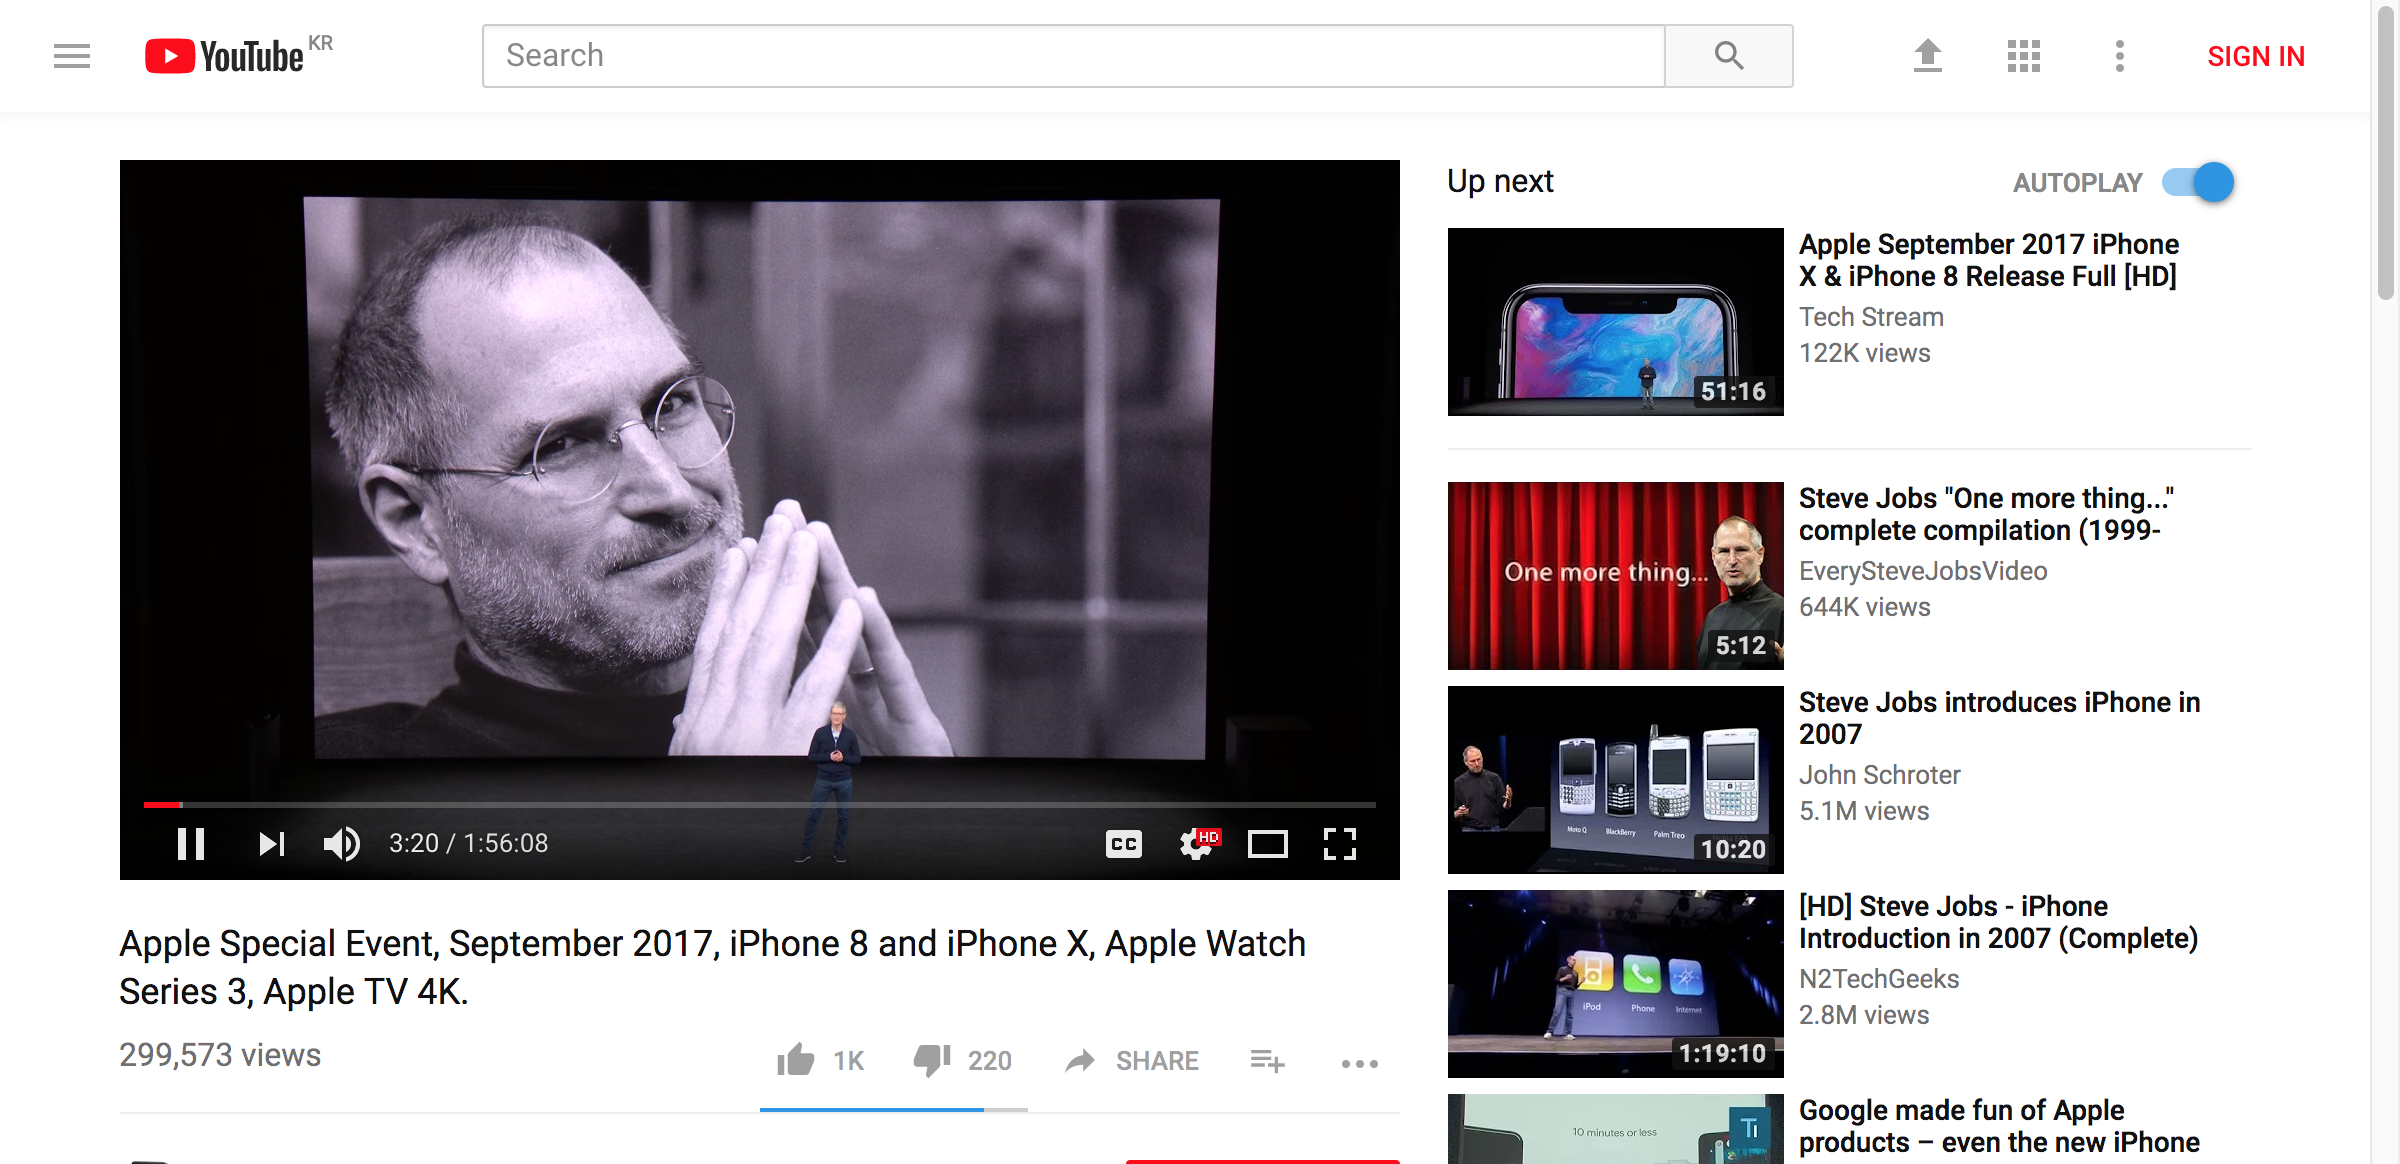

In [4]:
# check the image file size and image with pillow
pil_im = pil.open('screenshot.png')
print(pil_im.size)
pil_im

### change image size

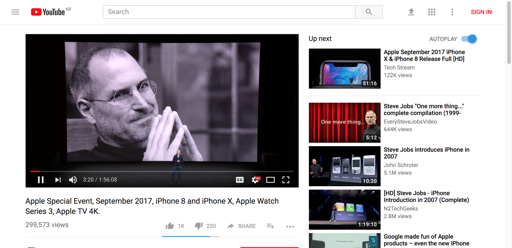

In [5]:
# pillow를 이용하여 512*512 사이즈로 이미지의 크기를 변환합니다.
pil_im.thumbnail((512, 512))
pil_im.save("screenshot_thumnail.png")
pil.open('screenshot_thumnail.png')

### select element image
- we can crop particular area
- calculating location might vary depending on display resolution

In [6]:
# check location of selector element and size data
element = driver.find_element_by_css_selector('#movie_player')
location = element.location
size = element.size
location, size

({'x': 60, 'y': 80}, {'height': 360, 'width': 640})

In [7]:
# open original image file, and calculate left, right, top, bottem location.
# for retina display, double the location
pil_im = pil.open('screenshot.png')
left = location['x'] * 2
top = location['y'] * 2
right = left + size['width'] * 2
bottom = top + size['height'] * 2
area = (left, top, right, bottom)
area

(120, 160, 1400, 880)

In [8]:
# crop the image with pillow
pil_im = pil_im.crop(area) 

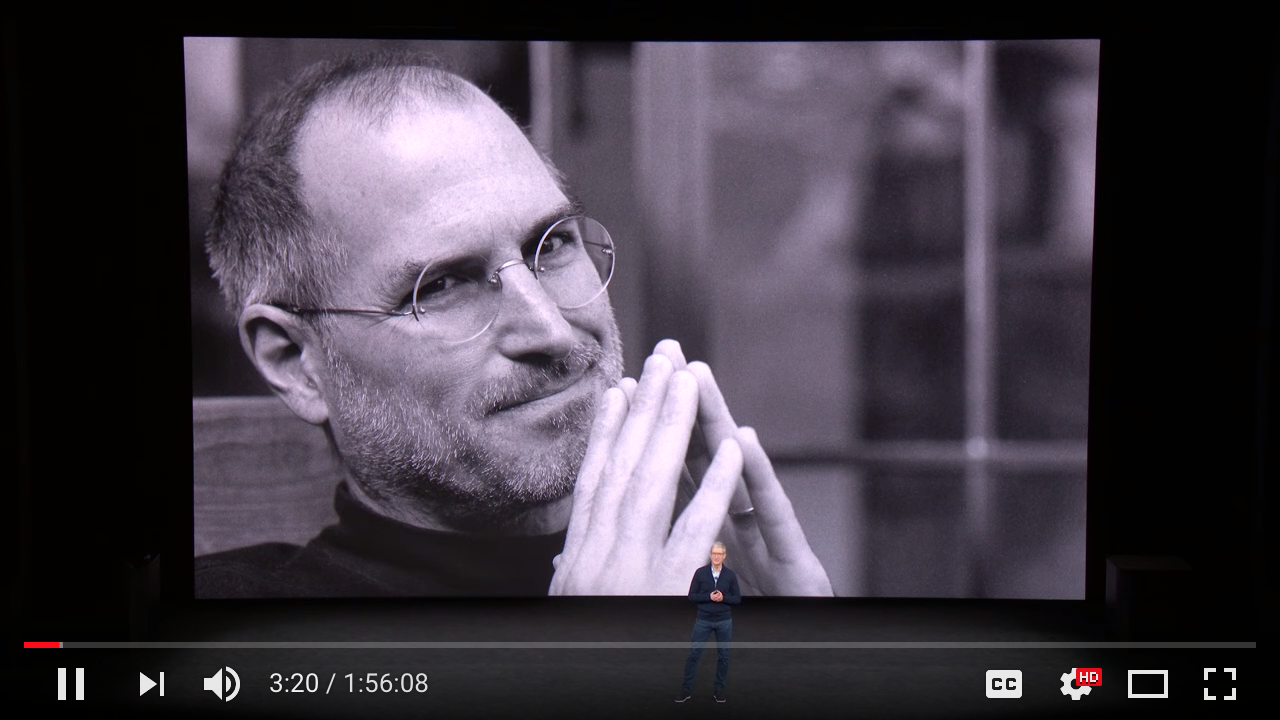

In [9]:
# save the cropped image and show it
pil_im.save("screenshot_element.png")
pil.open('screenshot_element.png')

In [10]:
# close the browser
driver.close()